In [1]:
# 주성분 분석(PCA : Principal Component Analysis)
# 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다.
# 첫번째 주성분으로 전체 변동을 가장 많이 설명할 수 있도록하고 두번째 주성분으로는 첫번째 주성분과는 상관성이 
# 없어서 첫번째 주성분이 설명하지 못하는 나머지 변등을 정보의 손실 없이 가장 많이 설명할 수 있도록 선형조합을 만든다. 
# PCA는 다중공선성 문제에도 탁월한 효과를 가지고 있다. 다중공선성이 의심되는 데이터를 PCA로 차원축소 시키면
# 상관관계가 높은 변수끼리 비슷한 분포로 차원축소가 되므로 하나의 변수처럼 보이게 된다.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
arrest = pd.read_csv('USArrests.csv')
arrest = arrest.set_index('Unnamed: 0')
arrest.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
# 앞선 MDS에서 같은 데이터를 다루었기 때문에 결측치, 이상치 처리에 대해서는 넘어가도록하겠다.

In [4]:
# 결측치 확인
arrest.isnull().any()

Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [5]:
# 데이터 타입 확인
arrest.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

In [6]:
# 데이터 범위를 맞춰주기 위한 스케일링 작업
scaler = StandardScaler()
scaled = scaler.fit_transform(arrest)
df = pd.DataFrame(scaled)
df.index = arrest.index
df.columns = arrest.columns
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


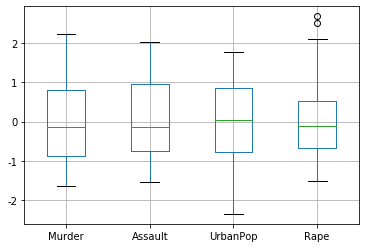

In [8]:
# 스케일링 작업 후 이상치 확인
# Rape 변수에 두가지 이상치가 확인되지만 극단적인 이상치가 아니기 때문에 제거하지않는다.
df.boxplot()
plt.show()

In [24]:
# 다중공선성이 의심되는 변수는 보이지 않기 때문에 변수 제거없이 계속하도록 한다.
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [10]:
# PCA를 활용하여 2차원의 변수로 축소해준다.
pca = PCA(n_components = 2)
model = pca.fit_transform(df)
df_pca = pd.DataFrame(model)
df_pca.head()

,0,1
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [15]:
# PCA 기법에서 중요한 역할을 하는 고윳값, 고유벡터, 고유벡터의 percentage를 구해준다.
# 여기서 유의깊게 봐야할 것을 percentage인데 첫번째 component가 전체 데이터의 62%를 설명하고 있고
# 두번째 component가 전체 데이터의 24%를 설명한다. 그렇기 때문에 첫번째와 두번째 주성분을 합치면
# 전체 데이터의 86%를 설명한다.
pca_fit = pca.fit(df)
print("고윳값(eigenvector) : ", pca_fit.components_)
print("고유벡터(eigenvalue) : ", pca_fit.explained_variance_)
print("percentage : ", pca_fit.explained_variance_ratio_)

고윳값(eigenvector) :  [[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]]
고유벡터(eigenvalue) :  [2.53085875 1.00996444]
percentage :  [0.62006039 0.24744129]


In [16]:
# 그래프를 그리기 앞서 로딩벡터에 대해 간단하게 설명하겠다.
# 로딩벡터는 주성분을 계산할 때 원래 변수에 대한 가중치를 뜻하고 고유벡터와 고유치의 제곱근의 곱으로 표현한다.
loading_vector = pca_fit.components_.T* np.sqrt(pca_fit.explained_variance_)

In [18]:
x, y = df_pca[0], df_pca[1]
cityname = pd.Series(arrest.index)

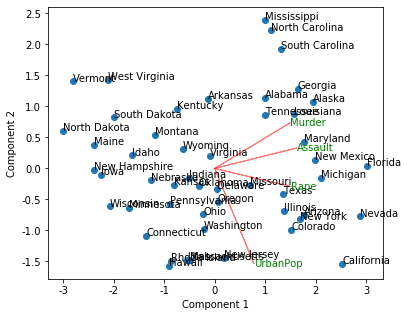

In [23]:
# 먼저 가까이 위치해있는 도시일수록 비슷한 종류의 범죄율을 가진다는 뜻이다. 그리고 빨간선을 보도록 하자.
# 첫번째 주성분이 assault, murder, rape와 비슷한 방향을 가지고 urbanpop과 방향이 수직에 가까운 것으로 보아
# 첫번째 주성분이 주로  assault, murder, rape 변수들에 대해 상대적으로 큰 가중치를 적용하여 계산되었다.
# 두번째 주성분은 urbanpop과 상대적으로 평행하기 때문에 다른 변수들에 비해 urbanpop의 영향을 크게 받아 구성되었다.
# 그러므로 첫번째 주성분의 값이 클 수록 세가지 범죄 발생율이 큰 주이고 두번째 주성분이 작을 수록 도심인구 비율이 큰 주라고 해석 할 수 있다.
plt.figure(figsize=(6, 5))
plt.scatter(x, y)
for i in range(arrest.shape[0]):
    plt.text(x[i], y[i], cityname[i])
for i in range(loading_vector.shape[0]):
    plt.arrow(0, 0, loading_vector[i,0]*1.75, 
              loading_vector[i,1]*1.75,color = 'r', alpha = 0.5)
    plt.text(loading_vector[i,0]*1.75, loading_vector[i,1]*1.75, 
             arrest.columns[i], color = 'g', va = 'center')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()